# Transcribing Speech - Discrepancies between spoken and written language

+ ###### Author: Dirk Van Compernolle   
+ ###### Modification History: 12/01/2024
+ ###### Required packages:  pyspch>=0.8

Speech is a continuous signal without abrupt boundaries separating successive sounds.
A transcription of speech and equally so any form of written language is a sequence of discrete symbols.
The simple fact that we can make such transcriptions suggests that 2 levels of discretization are plausible:   
- boundaries in time between two successive sounds
- categorical boundaries in an alphabet of elementary speech sounds

European languages all use some form of phonetic alphabet (thx to the Foenicians that popularized such writing system across the mediterranean and which was eventually adopted by the ancient Greek and Romans).  Other languages such as Chinese are primarily syllabic.

The mapping from a continous signal to a discrete representation is far less trivial than human intuition and seemingly peaceful coexistence of spoken and written langauge would suggest. In this matter, don't forget that you learned to listen before you were 1 yr old, learned to speak as a toddler and only learned about written language when you were six.  The listening and speaking came intuitively, the writing was hard work at school. 

## Setting Up
You need the **pyspch** package to run this notebook.   
If not installed, uncomment the pip install command in the next cell and install it .   
After that you can import all necessary packages

In [ ]:
#
#!pip install git+https://github.com/compi1234/pyspch.git
#
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [ ]:
%matplotlib inline
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt

import pyspch.core as Sp
import pyspch.sp as Sps
import pyspch.display as Spd

## 1. Read in audio data and compute spectrograms

In [3]:
# Some audio examples to choose from in the spchlab/data directory
# timit/   si1027, sa1, sx313
# misc/    friendly, m1, f1, f2, ..  
# Many more available in 
# dir = 'https://homes.esat.kuleuven.be/~spchlab/data/'
###########################

dir = "../data/"
#name = 'misc/friendly'
name = 'timit/si1027'
#
wavfname = os.path.join(dir,name+".wav")
wavdata, sr = Sp.load(wavfname)
# get segmentations and convert TIMIT segmentations from sample indices to time, 
# plus map from the TIMIT61 alphabet to CMU
if name.split('/')[0] == 'timit':
    dsegt = 1./16000.
    xlat = 'timit61_cmu'
else:
    dsegt = 1.
    xlat = None
    
# find the available segmentations+annotations 
segwrd = Sp.read_seg_file(dir+name+ ".wrd",dt=dsegt,fmt='float32')
segsyl = Sp.read_seg_file(dir+name+ ".syl",dt=dsegt,fmt='float32')
seggra = Sp.read_seg_file(dir+name+ ".gra",dt=dsegt,fmt='float32')
segphn = Sp.read_seg_file(dir+name+ ".phn",dt=dsegt,fmt='float32',xlat=xlat)

# compute spectrograms 
shift=0.01
spgfreq = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift)
(nparam,nfr)=spgfreq.shape
d_freq = sr/(2.*(nparam-1))

WARNING(read_seg_file): reading/converting segmentation file ../data/timit/si1027.gra failed


## 2. Levels of Transcriptions

We can make different levels of transcriptions of speech:   
- word
- syllable
- letter
- phoneme

We should make a distinction between a **transcription** and a **segmentation** .  In the case of a **transcription** we merely give a transcipt at the correct level.  In case of a **segmentation** we align the transcription to the waveform as well, i.e. we provide begin and end times for each segment.

The ambiguity for *word transcriptions* is minimal if the quality of speech is moderate or good.  On the other hand *segmentations* at the *letter of phoneme* level are highly *ambiguous*.   First of all speech is a continous signal without clear segmental boundaries, thus marking such boundaries is fuzzy business by nature.  Moreover, when listening to very short segments of speech, different transcribers will often disagree on the nature of the speech sounds.

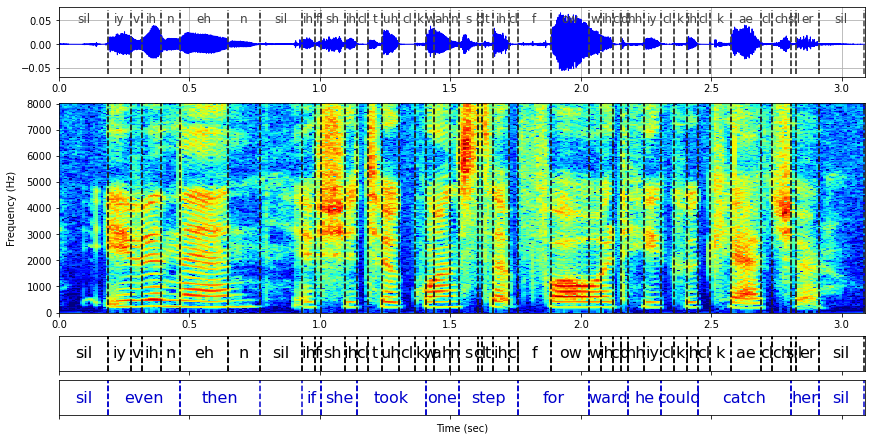

In [4]:
#segdata=[segphn,seggra,segsyl,segwrd]
segdata=[segphn,segsyl]

fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spgfreq,segdata=segdata,   
              sample_rate=sr,dy=None)
seg=segphn
fig.add_seg_plot(seg,iax=0,ypos=0.85,color="#444",size=12,Lines=True)
fig.add_seg_plot(seg,iax=1,ypos=None,color="#222")
display(fig)